In [11]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from globals import BASE_DIR


dataset = "brightkite"
# Load data
df = pd.read_csv(f"{BASE_DIR}/{dataset}_dataset/evaluation_results.csv")  # Replace with your data source

# Replace with your data source

# Features & Target
X = df[['model', 'method', 'user_group', 'dataset', 'arp', 'poplift', 'js']]
y = df['ndcg']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=['model', 'method', 'user_group', 'dataset'])
X_encoded = X_encoded.astype(float)
# Standardize numerical features
scaler = StandardScaler()
X_encoded[['arp', 'poplift', 'js']] = scaler.fit_transform(X_encoded[['arp', 'poplift', 'js']])

# Add constant to the model (intercept)
X_encoded = sm.add_constant(X_encoded)

# Fit OLS (Ordinary Least Squares) model
model = sm.OLS(y, X_encoded)
results = model.fit()

# Print the summary, which includes p-values
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   ndcg   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     46.54
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           3.44e-23
Time:                        01:28:47   Log-Likelihood:                 240.27
No. Observations:                  64   AIC:                            -454.5
Df Residuals:                      51   BIC:                            -426.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
arp                    0.0377      0

In [12]:
corr_matrix = X_encoded.corr()
print(corr_matrix)

                         arp   poplift        js     model_BPR    model_LORE  \
arp                 1.000000  0.665484  0.374350 -3.778209e-02 -5.067230e-01   
poplift             0.665484  1.000000  0.257136 -5.777716e-02 -4.210445e-01   
js                  0.374350  0.257136  1.000000  4.124822e-02 -2.663219e-01   
model_BPR          -0.037782 -0.057777  0.041248  1.000000e+00 -3.333333e-01   
model_LORE         -0.506723 -0.421045 -0.266322 -3.333333e-01  1.000000e+00   
model_SimpleX      -0.051212 -0.045947 -0.129705 -3.333333e-01 -3.333333e-01   
model_USG           0.595717  0.524768  0.354778 -3.333333e-01 -3.333333e-01   
method_baseline     0.258396  0.265522  0.054443 -3.700743e-17 -4.857226e-17   
method_cp           0.226773  0.220835 -0.095418  5.784247e-17  3.702579e-17   
method_cp_min_js   -0.127917 -0.108033 -0.562529 -1.064331e-16 -3.704415e-17   
method_upd         -0.357253 -0.378324  0.603504  1.156482e-17  3.469447e-18   
user_group_all      0.000935 -0.015727 -

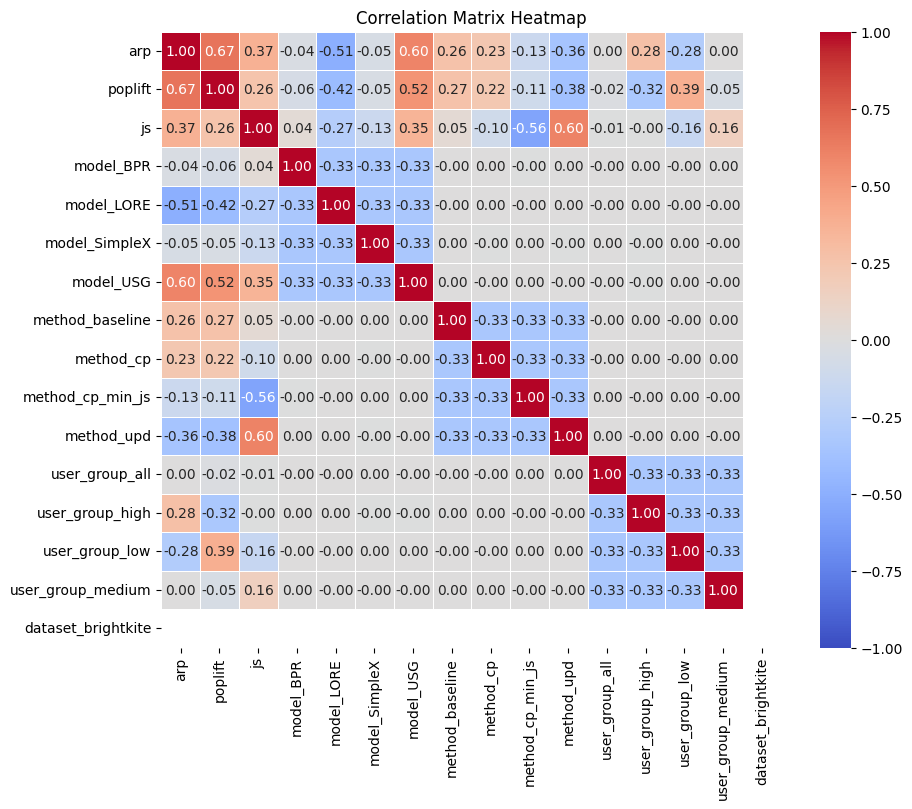

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()
